In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
economic_data = pd.read_csv('/workspaces/Electoral-Economic-Analysis/electoral_analysis/processed_bea_economic_growth.csv')
electoral_data = pd.read_csv('/workspaces/Electoral-Economic-Analysis/electoral_analysis/processed_electoral_data.csv')


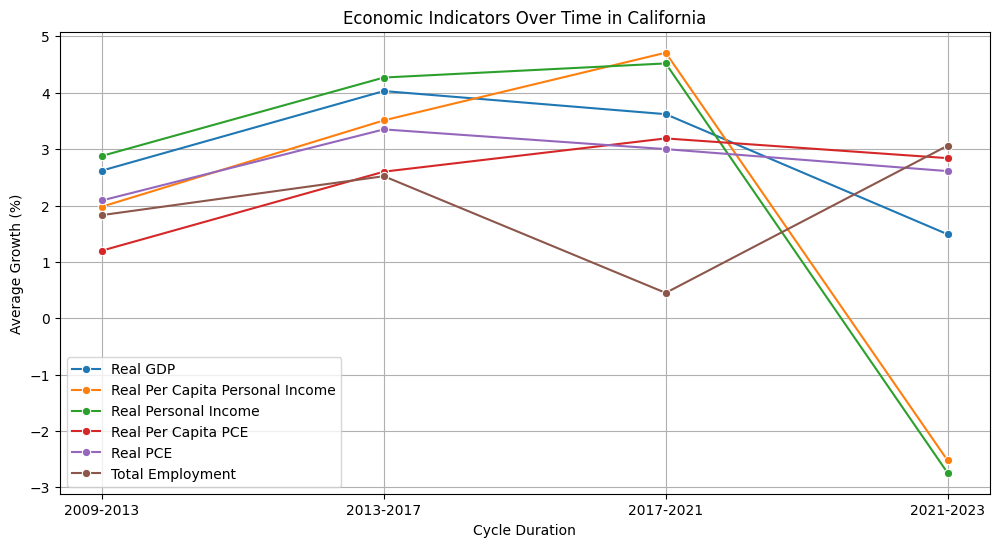

In [21]:
def plot_multiple_time_series(data, state, indicators, title, xlabel, ylabel):
    plt.figure(figsize=(12, 6))
    for indicator in indicators:
        indicator_data = data[(data['State'] == state) & (data['Indicator'] == indicator)]
        sns.lineplot(data=indicator_data, x='Cycle Duration', y='Average Growth (%)', marker='o', label=indicator)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.grid(True)
    plt.show()

# Define the indicators
indicators = ['Real GDP', 'Real Per Capita Personal Income', 'Real Personal Income', 'Real Per Capita PCE', 'Real PCE', 'Total Employment']

# Plot the economic indicators for California
plot_multiple_time_series(
    data=economic_data,
    state='California',
    indicators=indicators,
    title='Economic Indicators Over Time in California',
    xlabel='Cycle Duration',
    ylabel='Average Growth (%)'
)

In [ ]:
# Filter the data for a specific state and office
state = 'ALASKA'
office = 'US PRESIDENT'
state_data = electoral_data[(electoral_data['State'] == state) & (electoral_data['Office'] == office)]

def plot_party_trends(data, state, office, title, xlabel, ylabel):
    plt.figure(figsize=(12, 6))
    
    # Plot Democratic trend
    dem_winning_data = data[data['Winning Party'] == 'DEMOCRAT']
    dem_losing_data = data[data['Losing Party'] == 'DEMOCRAT']
    print(f"Democratic winning data:\n{dem_winning_data[['Year', 'Winning Percentage']]}")
    print(f"Democratic losing data:\n{dem_losing_data[['Year', 'Losing Percentage']]}")
    sns.lineplot(data=dem_winning_data, x='Year', y='Winning Percentage', marker='o', label='Democratic (Winning)', color='blue')
    sns.lineplot(data=dem_losing_data, x='Year', y='Losing Percentage', marker='o', label='Democratic (Losing)', color='lightblue')
    
    # Plot Republican trend
    rep_winning_data = data[data['Winning Party'] == 'REPUBLICAN']
    rep_losing_data = data[data['Losing Party'] == 'REPUBLICAN']
    print(f"Republican winning data:\n{rep_winning_data[['Year', 'Winning Percentage']]}")
    print(f"Republican losing data:\n{rep_losing_data[['Year', 'Losing Percentage']]}")
    sns.lineplot(data=rep_winning_data, x='Year', y='Winning Percentage', marker='o', label='Republican (Winning)', color='red')
    sns.lineplot(data=rep_losing_data, x='Year', y='Losing Percentage', marker='o', label='Republican (Losing)', color='pink')
    
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage
plot_party_trends(
    data=state_data,
    state='CALIFORNIA',
    office='US PRESIDENT',
    title='Winning and Losing Percentages Over Time in California',
    xlabel='Year',
    ylabel='Percentage'
)
    

In [4]:
# Define the states and office
states = [state for state in electoral_data['State'].unique()]
print(f"States in the data: {len(states)}")

office = 'US PRESIDENT'
state_data = electoral_data[(electoral_data['State'].isin(states)) & (electoral_data['Office'] == office)]
print(f"Filtered data for {states} and {office}:\n{state_data}")

States in the data: 51
Filtered data for ['ALABAMA', 'ALASKA', 'ARIZONA', 'ARKANSAS', 'CALIFORNIA', 'COLORADO', 'CONNECTICUT', 'DELAWARE', 'DISTRICT OF COLUMBIA', 'FLORIDA', 'GEORGIA', 'HAWAII', 'IDAHO', 'ILLINOIS', 'INDIANA', 'IOWA', 'KANSAS', 'KENTUCKY', 'LOUISIANA', 'MAINE', 'MARYLAND', 'MASSACHUSETTS', 'MICHIGAN', 'MINNESOTA', 'MISSISSIPPI', 'MISSOURI', 'MONTANA', 'NEBRASKA', 'NEVADA', 'NEW HAMPSHIRE', 'NEW JERSEY', 'NEW MEXICO', 'NEW YORK', 'NORTH CAROLINA', 'NORTH DAKOTA', 'OHIO', 'OKLAHOMA', 'OREGON', 'PENNSYLVANIA', 'RHODE ISLAND', 'SOUTH CAROLINA', 'SOUTH DAKOTA', 'TENNESSEE', 'TEXAS', 'UTAH', 'VERMONT', 'VIRGINIA', 'WASHINGTON', 'WEST VIRGINIA', 'WISCONSIN', 'WYOMING'] and US PRESIDENT:
     Year          State        Office    Winning Candidate Winning Party  \
0    2008        ALABAMA  US PRESIDENT         MCCAIN, JOHN    REPUBLICAN   
1    2008         ALASKA  US PRESIDENT         MCCAIN, JOHN    REPUBLICAN   
2    2008        ARIZONA  US PRESIDENT         MCCAIN, JOHN    

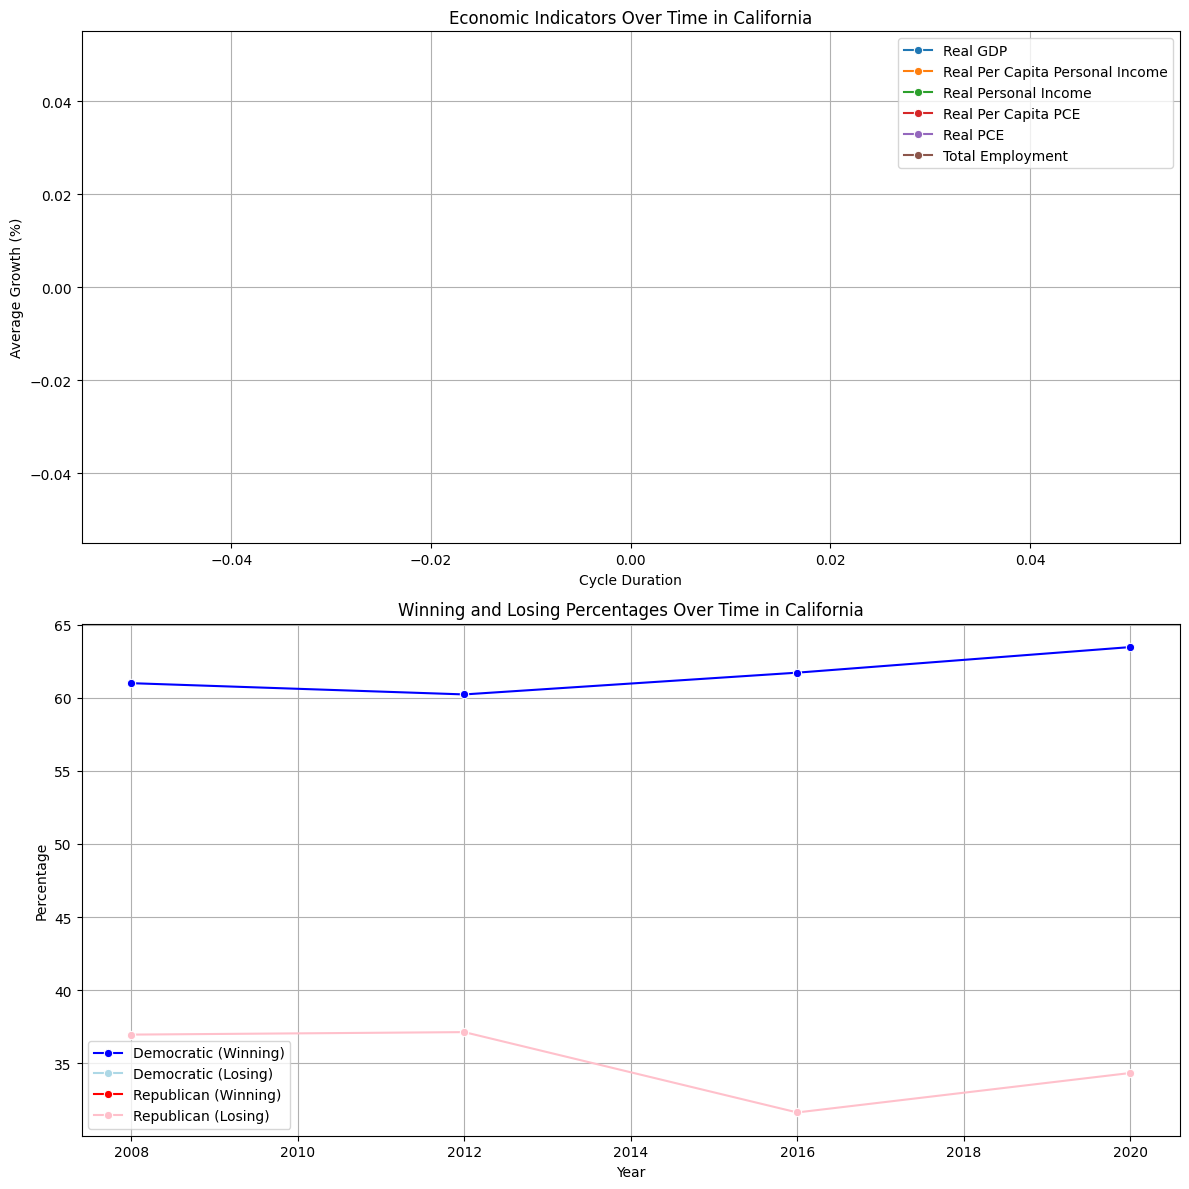

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_multiple_time_series(ax, data, state, indicators, title, xlabel, ylabel):
    for indicator in indicators:
        indicator_data = data[(data['State'] == state) & (data['Indicator'] == indicator)]
        sns.lineplot(data=indicator_data, x='Cycle Duration', y='Average Growth (%)', marker='o', label=indicator, ax=ax)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend()
    ax.grid(True)

def plot_party_trends(ax, data, state, office, title, xlabel, ylabel):
    # Plot Democratic trend
    dem_winning_data = data[data['Winning Party'] == 'DEMOCRAT']
    dem_losing_data = data[data['Losing Party'] == 'DEMOCRAT']
    sns.lineplot(data=dem_winning_data, x='Year', y='Winning Percentage', marker='o', label='Democratic (Winning)', color='blue', ax=ax)
    sns.lineplot(data=dem_losing_data, x='Year', y='Losing Percentage', marker='o', label='Democratic (Losing)', color='lightblue', ax=ax)
    
    # Plot Republican trend
    rep_winning_data = data[data['Winning Party'] == 'REPUBLICAN']
    sns.lineplot(data=rep_winning_data, x='Year', y='Winning Percentage', marker='o', label='Republican (Winning)', color='red', ax=ax)
    rep_losing_data = data[data['Losing Party'] == 'REPUBLICAN']
    sns.lineplot(data=rep_losing_data, x='Year', y='Losing Percentage', marker='o', label='Republican (Losing)', color='pink', ax=ax)
    
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend()
    ax.grid(True)

# Define the indicators
indicators = ['Real GDP', 'Real Per Capita Personal Income', 'Real Personal Income', 'Real Per Capita PCE', 'Real PCE', 'Total Employment']

# Example usage
state = 'CALIFORNIA'
office = 'US PRESIDENT'

# Filter the data for the specific state and office
state_data = electoral_data[(electoral_data['State'] == state) & (electoral_data['Office'] == office)]

# Create subplots
fig, axs = plt.subplots(2, 1, figsize=(12, 12))

# Plot the economic indicators
plot_multiple_time_series(
    ax=axs[0],
    data=economic_data,
    state=state,
    indicators=indicators,
    title='Economic Indicators Over Time in California',
    xlabel='Cycle Duration',
    ylabel='Average Growth (%)'
)

# Plot the electoral results
plot_party_trends(
    ax=axs[1],
    data=state_data,
    state=state,
    office=office,
    title='Winning and Losing Percentages Over Time in California',
    xlabel='Year',
    ylabel='Percentage'
)

plt.tight_layout()
plt.show()